# Data Pre-processing

## Notebook Summary

This notebook focuses on preparing a cleaned dataset for linear modelling techniques, such as linear regression and ridge regression. The notebook details pre-processing steps, including standardising or normalising features to meet the assumptions of linear models. A key component is feature engineering, which involves creating or transforming variables to better capture underlying patterns and improve model performance. The dataset will be structured to ensure optimal performance and interpretability, providing a robust foundation for accurate predictive modelling using techniques such as linear regression and ridge regression.

## Notebook Setup

In [2]:
# Imports
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

## Data Loading & Understanding

In [3]:
# Creating DataFrame
clean_house_df = pd.read_csv("london_house_price_data_clean.csv")
# Viewing DataFrame
clean_house_df.head(5)

,fullAddress,postcode,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,...,saleEstimate_lowerPrice,saleEstimate_currentPrice,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_ingestedAt,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,saleEstimate_valueChange.saleDate,history_date,history_price
0,"Flat 35, Octavia House, Medway Street, London,...",SW1P 2TA,SW1P,51.495505,-0.132379,2.0,2.0,71.0,1.0,Leasehold,...,683000.0,759000.0,834000.0,MEDIUM,2025-01-10T11:04:57.114Z,49000.0,6.901408,2019-09-04,1995-01-03,249950
1,"24 Chester Court, Lomond Grove, London, SE5 7HS",SE5 7HS,SE5,51.478185,-0.092201,1.0,1.0,64.0,1.0,Leasehold,...,368000.0,388000.0,407000.0,HIGH,2024-10-07T13:26:59.894Z,28000.0,7.777778,2024-01-25,1995-01-03,32000
2,"18 Alexandra Gardens, London, N10 3RL",N10 3RL,N10,51.588774,-0.139599,1.0,4.0,137.0,2.0,Freehold,...,1198000.0,1261000.0,1324000.0,HIGH,2024-10-07T13:26:59.894Z,81000.0,6.864407,2022-12-14,1995-01-03,133000
3,"17 Collins Street, London, SE3 0UG",SE3 0UG,SE3,51.466089,0.006967,1.0,2.0,97.0,1.0,Freehold,...,897000.0,944000.0,991000.0,HIGH,2024-10-07T13:26:59.894Z,119000.0,14.424242,2021-09-30,1995-01-03,128500
4,"14 Theodore Road, London, SE13 6HT",SE13 6HT,SE13,51.451327,-0.007569,1.0,3.0,135.0,2.0,Freehold,...,690000.0,726000.0,762000.0,HIGH,2024-10-07T13:26:59.894Z,71000.0,10.839695,2021-12-06,1995-01-03,75000


In [4]:
# Columns and data types
clean_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265911 entries, 0 to 265910
Data columns (total 25 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   fullAddress                                265911 non-null  object 
 1   postcode                                   265911 non-null  object 
 2   outcode                                    265911 non-null  object 
 3   latitude                                   265911 non-null  float64
 4   longitude                                  265911 non-null  float64
 5   bathrooms                                  265911 non-null  float64
 6   bedrooms                                   265911 non-null  float64
 7   floorAreaSqM                               265911 non-null  float64
 8   livingRooms                                265911 non-null  float64
 9   tenure                                     265911 non-null  object 
 10  property

In [5]:
# Shape of the data
rows, cols = clean_house_df.shape
print(f"The data has {rows} rows and {cols} columns")

The data has 265911 rows and 25 columns


### Categorical columns

The data input for regression models must be strictly numerical, necessitating the transformation of categorical variables into a suitable numerical format. This ensures compatibility with the mathematical foundations of regression algorithms.

- 'fullAddress'
- 'postcode'
- 'outcode'
- 'tenure'
- 'propertyType'
- 'currentEnergyRating'
- 'saleEstimate_confidenceLevel' 

### Date columns

Dates are typically stored as strings or datetime objects, which are not directly interpretable by the model. Therefore date values should be promptly removed. 

- 'saleEstimate_ingestedAt' 
- 'saleEstimate_valueChange.saleDate' 
- 'history_date'    

### Leakage columns

These columns provide insights into the target variable, must be removed to maintain the integrity of the statistical models. This action prevents data leakage and overfitting, ensuring that the model generalizes effectively to unseen data.

- 'rentEstimate_lowerPrice'
- 'rentEstimate_currentPrice'
- 'rentEstimate_upperPrice'
- 'saleEstimate_lowerPrice' 
- 'saleEstimate_upperPrice' 
- 'saleEstimate_confidenceLevel'
- 'saleEstimate_valueChange.numericChange'
- 'saleEstimate_valueChange.percentageChange'
- 'history_price'

## Redundant Feature Removal

#### Date columns

In [6]:
# Dropping multiple date columns
clean_house_df = clean_house_df.drop(columns=['saleEstimate_ingestedAt', 'saleEstimate_valueChange.saleDate', 'history_date'])

#### fullAddress column

In [7]:
# Count the number of unique values in the 'fullAddress' column
print(f"The fullAddress column has {clean_house_df['fullAddress'].nunique()} unique values")

# Dropping column
clean_house_df = clean_house_df.drop('fullAddress', axis=1)


The fullAddress column has 82613 unique values


#### postcode column

In [8]:
# Count the number of unique values in the 'postcode' column
print(f"The postcode column has {clean_house_df['postcode'].nunique()} unique values")

# Dropping column
clean_house_df = clean_house_df.drop('postcode', axis=1)

The postcode column has 38578 unique values


#### outcode column

In [9]:
# Count the number of unique values in the 'outcode' column
print(f"The outcode column has {clean_house_df['outcode'].nunique()} unique values")

# Dropping column
clean_house_df = clean_house_df.drop('outcode', axis=1)

The outcode column has 167 unique values


#### Leakage columns

In [10]:
# Dropping leakage columns
clean_house_df = clean_house_df.drop(columns=['rentEstimate_lowerPrice', 'rentEstimate_currentPrice', 'rentEstimate_upperPrice','saleEstimate_lowerPrice', 'saleEstimate_upperPrice', 'saleEstimate_confidenceLevel', 'saleEstimate_valueChange.numericChange', 'saleEstimate_valueChange.percentageChange', 'history_price'])

## Feature Engineering

#### tenure column


In [11]:
# Count the number of unique values in the 'tenure' column
print(f"The tenure column has {clean_house_df['tenure'].nunique()} unique values")

# Unique values in the column
tenure_unique_values = clean_house_df['tenure'].unique()

# Displaying the unique values
print(tenure_unique_values)

The tenure column has 4 unique values
['Leasehold' 'Freehold' 'Feudal' 'Shared']


In [12]:
# Initialising OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)  

# Fit and transform the data
tenure_encoded = encoder.fit_transform(clean_house_df[['tenure']])

# Converting the result to a DataFrame
tenure_encoded_df = pd.DataFrame(tenure_encoded, columns=encoder.get_feature_names_out(['tenure']))

# Concatenating the one-hot encoded columns with the original dataframe
clean_house_df = pd.concat([clean_house_df, tenure_encoded_df], axis=1)

# Drop the original column
clean_house_df = clean_house_df.drop('tenure', axis=1)

#### propertyType column

In [13]:
# Count the number of unique values in the 'propertyType' column
print(f"The propertyType column has {clean_house_df['propertyType'].nunique()} unique values")

# Unique values in the column
property_unique_values = clean_house_df['propertyType'].unique()

# Displaying the unique values
print(property_unique_values)

The propertyType column has 19 unique values
['Flat/Maisonette' 'End Terrace House' 'Mid Terrace House'
 'Terrace Property' 'Semi-Detached House' 'Converted Flat'
 'Purpose Built Flat' 'Detached House' 'Bungalow Property' 'Terraced'
 'Detached Bungalow' 'Mid Terrace Property' 'Semi-Detached Bungalow'
 'End Terrace Property' 'Terraced Bungalow' 'Mid Terrace Bungalow'
 'Semi-Detached Property' 'Detached Property' 'End Terrace Bungalow']


In [14]:
# Initialising OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)  

# Fit and transform the data
property_encoded = encoder.fit_transform(clean_house_df[['propertyType']])

# Converting the result to a DataFrame
property_encoded_df = pd.DataFrame(property_encoded, columns=encoder.get_feature_names_out(['propertyType']))

# Concatenating the one-hot encoded columns with the original dataframe
clean_house_df = pd.concat([clean_house_df, property_encoded_df], axis=1)

# Drop the original column
clean_house_df = clean_house_df.drop('propertyType', axis=1)

#### currentEnergyRating column

In [15]:
# Count the number of unique values in the 'currentEnergyRating' column
print(f"The currentEnergyRating column has {clean_house_df['currentEnergyRating'].nunique()} unique values")

# Unique values in the column
energy_unique_values = clean_house_df['currentEnergyRating'].unique()

# Displaying the unique values
print(energy_unique_values)

The currentEnergyRating column has 7 unique values
['C' 'D' 'E' 'G' 'B' 'F' 'A']


In [16]:
# Order of categories
categories = [['A', 'B', 'C', 'D', 'E', 'F', 'G']]

# Initialising encoder
encoder = OrdinalEncoder(categories=categories)

# Fit and transform the data
energy_encoded = encoder.fit_transform(clean_house_df[['currentEnergyRating']])

# Adding the encoded values to the dataframe
clean_house_df['currentEnergyRating_encoded'] = energy_encoded

# Drop the original column
clean_house_df = clean_house_df.drop('currentEnergyRating', axis=1)

## Pre-processed Data Review

In [17]:
# Viewing DataFrame post-conversions
clean_house_df.head(5)

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,saleEstimate_currentPrice,tenure_Feudal,tenure_Freehold,tenure_Leasehold,...,propertyType_Mid Terrace House,propertyType_Mid Terrace Property,propertyType_Purpose Built Flat,propertyType_Semi-Detached Bungalow,propertyType_Semi-Detached House,propertyType_Semi-Detached Property,propertyType_Terrace Property,propertyType_Terraced,propertyType_Terraced Bungalow,currentEnergyRating_encoded
0,51.495505,-0.132379,2.0,2.0,71.0,1.0,759000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,51.478185,-0.092201,1.0,1.0,64.0,1.0,388000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,51.588774,-0.139599,1.0,4.0,137.0,2.0,1261000.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,51.466089,0.006967,1.0,2.0,97.0,1.0,944000.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,51.451327,-0.007569,1.0,3.0,135.0,2.0,726000.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0


In [18]:
# Rows and columns post encoding
clean_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265911 entries, 0 to 265910
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   latitude                             265911 non-null  float64
 1   longitude                            265911 non-null  float64
 2   bathrooms                            265911 non-null  float64
 3   bedrooms                             265911 non-null  float64
 4   floorAreaSqM                         265911 non-null  float64
 5   livingRooms                          265911 non-null  float64
 6   saleEstimate_currentPrice            265911 non-null  float64
 7   tenure_Feudal                        265911 non-null  float64
 8   tenure_Freehold                      265911 non-null  float64
 9   tenure_Leasehold                     265911 non-null  float64
 10  tenure_Shared                        265911 non-null  float64
 11  propertyType_

## Multi-collinearity

Independent variables must not be too strongly correlated with one another, those which show high levels of multi-collinearity must be removed.

c:\Users\sanja\anaconda3\envs\ml_env\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


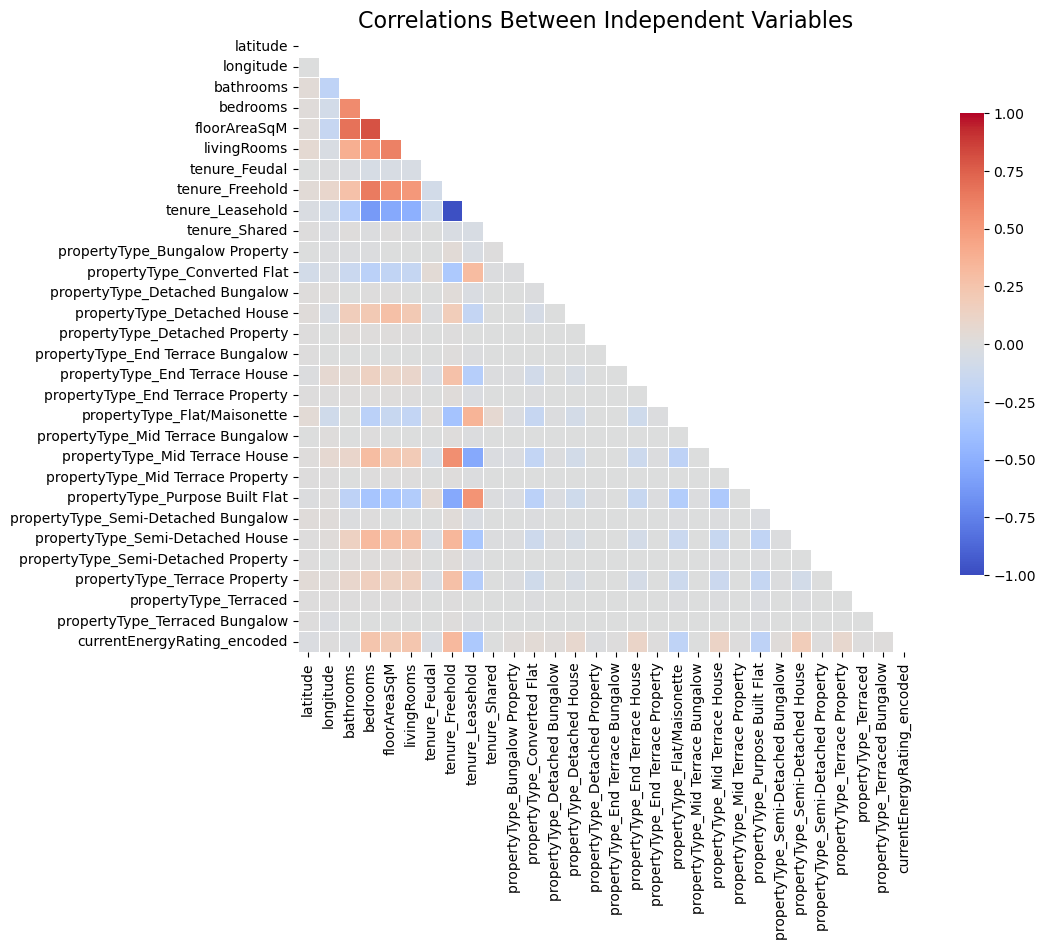

In [ ]:
# Splitting the target and features 
X = clean_house_df.drop('saleEstimate_currentPrice', axis=1)
y = clean_house_df['saleEstimate_currentPrice']

# Correlation matrix
corr = X.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  

# Draw the heatmap
sns.heatmap(
    data=corr,
    mask=mask,
    annot=True,
    fmt=".2f",               
    vmin=-1, vmax=1,
    cmap="coolwarm",
    square=True,
    linewidths=0.5,          
    cbar_kws={"shrink": 0.75}  
)

plt.title("Correlations Between Independent Variables", fontsize=16)
plt.show()


Tasks to do:
- Get numbers to display
- Find out which variables have a strong corr of 1 or -1
- Work out corr of those variables between the target and keep the ones with highest corr
- Remove the chosen columns from clean_house_df and then save it

In [25]:
# Saving the cleaned version of the dataset
clean_house_df.to_csv('london_house_price_data_pp.csv', index=False)